In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import quandl
import math

In [2]:
quandl.ApiConfig.api_key = "piAQQkEvBw6U4-3g-VHf"

In [3]:
df =quandl.get("WIKI/KO")

In [4]:
df

Open      High      Low   Close      Volume  Ex-Dividend  \
Date                                                                     
1962-01-02  101.00  103.7500  101.000  101.00     16800.0          0.0   
1962-01-03   99.50   99.5000   97.250   98.75     32800.0          0.0   
1962-01-04   99.00  100.2500   99.000   99.50     17600.0          0.0   
1962-01-05   99.50  100.7500   97.000   97.25     29600.0          0.0   
1962-01-08   96.50   96.5000   94.380   96.25     42400.0          0.0   
...            ...       ...      ...     ...         ...          ...   
2018-03-21   43.13   43.4500   42.790   43.00  13029766.0          0.0   
2018-03-22   42.88   43.3650   42.700   42.76  12134714.0          0.0   
2018-03-23   42.82   43.1556   42.290   42.33  13190877.0          0.0   
2018-03-26   42.61   42.8099   42.250   42.69  10939927.0          0.0   
2018-03-27   42.70   43.3100   42.525   42.89  11595357.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
1962-01-02          1.0   0.262323   0.269465   0.262323    0.262323   
1962-01-03          1.0   0.258427   0.258427   0.252583    0.256479   
1962-01-04          1.0   0.257128   0.260375   0.257128    0.258427   
1962-01-05          1.0   0.258427   0.261673   0.251934    0.252583   
1962-01-08          1.0   0.250635   0.250635   0.245129    0.249986   
...                 ...        ...        ...        ...         ...   
2018-03-21          1.0  43.130000  43.450000  42.790000   43.000000   
2018-03-22          1.0  42.880000  43.365000  42.700000   42.760000   
2018-03-23          1.0  42.820000  43.155600  42.290000   42.330000   
2018-03-26          1.0  42.610000  42.809900  42.250000   42.690000   
2018-03-27          1.0  42.700000  43.310000  42.525000   42.890000   

            Adj. Volume  
Date                     
1962-01-02    1612800.0  
1962-01-03    3148800.0  
1962-01-04    1689600.0  
1962-01-05    2841600.0  
1962-01-08    4070400.0  
...                 ...  
2018-03-21   13029766.0  
2018-03-22   12134714.0  
2018-03-23   13190877.0  
2018-03-26   10939927.0  
2018-03-27   11595357.0  

[14155 rows x 12 columns]

In [5]:
print(df)

              Open      High      Low   Close      Volume  Ex-Dividend  \
Date                                                                     
1962-01-02  101.00  103.7500  101.000  101.00     16800.0          0.0   
1962-01-03   99.50   99.5000   97.250   98.75     32800.0          0.0   
1962-01-04   99.00  100.2500   99.000   99.50     17600.0          0.0   
1962-01-05   99.50  100.7500   97.000   97.25     29600.0          0.0   
1962-01-08   96.50   96.5000   94.380   96.25     42400.0          0.0   
...            ...       ...      ...     ...         ...          ...   
2018-03-21   43.13   43.4500   42.790   43.00  13029766.0          0.0   
2018-03-22   42.88   43.3650   42.700   42.76  12134714.0          0.0   
2018-03-23   42.82   43.1556   42.290   42.33  13190877.0          0.0   
2018-03-26   42.61   42.8099   42.250   42.69  10939927.0          0.0   
2018-03-27   42.70   43.3100   42.525   42.89  11595357.0          0.0   

            Split Ratio  Adj. Open  A

In [6]:
df.head()

Open    High     Low   Close   Volume  Ex-Dividend  Split Ratio  \
Date                                                                           
1962-01-02  101.0  103.75  101.00  101.00  16800.0          0.0          1.0   
1962-01-03   99.5   99.50   97.25   98.75  32800.0          0.0          1.0   
1962-01-04   99.0  100.25   99.00   99.50  17600.0          0.0          1.0   
1962-01-05   99.5  100.75   97.00   97.25  29600.0          0.0          1.0   
1962-01-08   96.5   96.50   94.38   96.25  42400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1962-01-02   0.262323   0.269465  0.262323    0.262323    1612800.0  
1962-01-03   0.258427   0.258427  0.252583    0.256479    3148800.0  
1962-01-04   0.257128   0.260375  0.257128    0.258427    1689600.0  
1962-01-05   0.258427   0.261673  0.251934    0.252583    2841600.0  
1962-01-08   0.250635   0.250635  0.245129    0.249986    4070400.0

In [7]:
df.tail()

Open     High     Low  Close      Volume  Ex-Dividend  \
Date                                                                 
2018-03-21  43.13  43.4500  42.790  43.00  13029766.0          0.0   
2018-03-22  42.88  43.3650  42.700  42.76  12134714.0          0.0   
2018-03-23  42.82  43.1556  42.290  42.33  13190877.0          0.0   
2018-03-26  42.61  42.8099  42.250  42.69  10939927.0          0.0   
2018-03-27  42.70  43.3100  42.525  42.89  11595357.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0      43.13    43.4500    42.790       43.00   
2018-03-22          1.0      42.88    43.3650    42.700       42.76   
2018-03-23          1.0      42.82    43.1556    42.290       42.33   
2018-03-26          1.0      42.61    42.8099    42.250       42.69   
2018-03-27          1.0      42.70    43.3100    42.525       42.89   

            Adj. Volume  
Date                     
2018-03-21   13029766.0  
2018-03-22   12134714.0  
2018-03-23   13190877.0  
2018-03-26   10939927.0  
2018-03-27   11595357.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14155 entries, 1962-01-02 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         14155 non-null  float64
 1   High         14155 non-null  float64
 2   Low          14155 non-null  float64
 3   Close        14155 non-null  float64
 4   Volume       14155 non-null  float64
 5   Ex-Dividend  14155 non-null  float64
 6   Split Ratio  14155 non-null  float64
 7   Adj. Open    14155 non-null  float64
 8   Adj. High    14155 non-null  float64
 9   Adj. Low     14155 non-null  float64
 10  Adj. Close   14155 non-null  float64
 11  Adj. Volume  14155 non-null  float64
dtypes: float64(12)
memory usage: 1.4 MB


In [9]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [10]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Close']*100.0
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0
print(df)

              Open      High      Low   Close      Volume  Ex-Dividend  \
Date                                                                     
1962-01-02  101.00  103.7500  101.000  101.00     16800.0          0.0   
1962-01-03   99.50   99.5000   97.250   98.75     32800.0          0.0   
1962-01-04   99.00  100.2500   99.000   99.50     17600.0          0.0   
1962-01-05   99.50  100.7500   97.000   97.25     29600.0          0.0   
1962-01-08   96.50   96.5000   94.380   96.25     42400.0          0.0   
...            ...       ...      ...     ...         ...          ...   
2018-03-21   43.13   43.4500   42.790   43.00  13029766.0          0.0   
2018-03-22   42.88   43.3650   42.700   42.76  12134714.0          0.0   
2018-03-23   42.82   43.1556   42.290   42.33  13190877.0          0.0   
2018-03-26   42.61   42.8099   42.250   42.69  10939927.0          0.0   
2018-03-27   42.70   43.3100   42.525   42.89  11595357.0          0.0   

            Split Ratio  Adj. Open  A

In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'HL_PCT', 'PCT_change'],
      dtype='object')

In [12]:
df_drop=df.drop(columns=['Open','High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio'])

In [13]:
print(df_drop)

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
1962-01-02   0.262323   0.269465   0.262323    0.262323    1612800.0   
1962-01-03   0.258427   0.258427   0.252583    0.256479    3148800.0   
1962-01-04   0.257128   0.260375   0.257128    0.258427    1689600.0   
1962-01-05   0.258427   0.261673   0.251934    0.252583    2841600.0   
1962-01-08   0.250635   0.250635   0.245129    0.249986    4070400.0   
...               ...        ...        ...         ...          ...   
2018-03-21  43.130000  43.450000  42.790000   43.000000   13029766.0   
2018-03-22  42.880000  43.365000  42.700000   42.760000   12134714.0   
2018-03-23  42.820000  43.155600  42.290000   42.330000   13190877.0   
2018-03-26  42.610000  42.809900  42.250000   42.690000   10939927.0   
2018-03-27  42.700000  43.310000  42.525000   42.890000   11595357.0   

              HL_PCT  PCT_change  
Date                        

In [14]:
# df_drop Adj.Close, PCT_change, HL_PCT, Adj. Volume

In [15]:
df_drop.shape

(14155, 7)

In [16]:
df_drop.isnull().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
HL_PCT         0
PCT_change     0
dtype: int64

In [17]:
df_drop.isna().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
HL_PCT         0
PCT_change     0
dtype: int64

In [18]:
x = df_drop.describe()
print(x)

          Adj. Open     Adj. High      Adj. Low    Adj. Close   Adj. Volume  \
count  14155.000000  14155.000000  14155.000000  14155.000000  1.415500e+04   
mean      10.328644     10.412381     10.243999     10.333252  9.147155e+06   
std       12.701618     12.787281     12.618481     12.706384  7.932619e+06   
min        0.139866      0.140976      0.133837      0.138726  5.568000e+03   
25%        0.291334      0.293591      0.289110      0.291519  2.760000e+06   
50%        2.633555      2.663604      2.608941      2.638045  7.864700e+06   
75%       17.652654     17.852549     17.484096     17.663452  1.296170e+07   
max       48.210000     48.615000     47.740000     48.530000  1.241690e+08   

             HL_PCT    PCT_change  
count  14155.000000  14155.000000  
mean       1.763390      0.047946  
std        1.434640      1.291434  
min        0.000000    -23.750000  
25%        1.019682     -0.612252  
50%        1.475728      0.000000  
75%        2.158898      0.675676  


In [19]:
x = df_drop.corr()
print(x)

             Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  \
Adj. Open     1.000000   0.999956  0.999892    0.999915     0.438459   
Adj. High     0.999956   1.000000  0.999870    0.999959     0.439816   
Adj. Low      0.999892   0.999870  1.000000    0.999896     0.436663   
Adj. Close    0.999915   0.999959  0.999896    1.000000     0.438236   
Adj. Volume   0.438459   0.439816  0.436663    0.438236     1.000000   
HL_PCT       -0.075773  -0.072966 -0.085260   -0.075896     0.208484   
PCT_change   -0.002098   0.002201  0.002076    0.006036     0.018958   

               HL_PCT  PCT_change  
Adj. Open   -0.075773   -0.002098  
Adj. High   -0.072966    0.002201  
Adj. Low    -0.085260    0.002076  
Adj. Close  -0.075896    0.006036  
Adj. Volume  0.208484    0.018958  
HL_PCT       1.000000   -0.009142  
PCT_change  -0.009142    1.000000  


In [20]:
x = df_drop.cov()
x.style.bar(color = 'green')

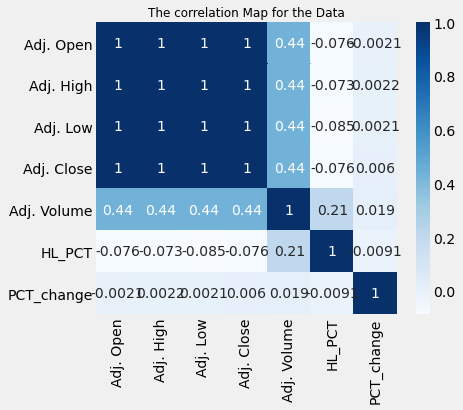

In [21]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(df_drop.corr(),
            cmap = 'Blues',
            annot = True)
plt.title('The correlation Map for the Data', fontsize = 12)
plt.show()

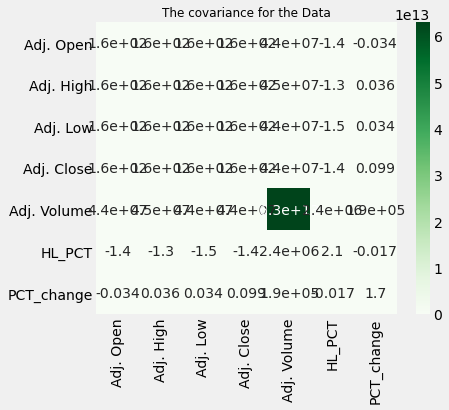

In [22]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(df_drop.cov(),
            cmap = 'Greens',
            annot = True)
plt.title('The covariance for the Data', fontsize = 12)
plt.show()

In [23]:
new_df = pd.DataFrame(data=df_drop,columns=['PCT_Change','HL_PCT','Adj. Volume','Adj.Close'])

In [24]:
new_df

PCT_Change    HL_PCT  Adj. Volume  Adj.Close
Date                                                    
1962-01-02         NaN  2.722772    1612800.0        NaN
1962-01-03         NaN  2.278481    3148800.0        NaN
1962-01-04         NaN  1.256281    1689600.0        NaN
1962-01-05         NaN  3.856041    2841600.0        NaN
1962-01-08         NaN  2.202597    4070400.0        NaN
...                ...       ...          ...        ...
2018-03-21         NaN  1.534884   13029766.0        NaN
2018-03-22         NaN  1.555192   12134714.0        NaN
2018-03-23         NaN  2.044885   13190877.0        NaN
2018-03-26         NaN  1.311548   10939927.0        NaN
2018-03-27         NaN  1.830263   11595357.0        NaN

[14155 rows x 4 columns]

In [25]:
new_df1=new_df.fillna(-99999,axis=1)

In [26]:
new_df1

PCT_Change    HL_PCT  Adj. Volume  Adj.Close
Date                                                    
1962-01-02    -99999.0  2.722772    1612800.0   -99999.0
1962-01-03    -99999.0  2.278481    3148800.0   -99999.0
1962-01-04    -99999.0  1.256281    1689600.0   -99999.0
1962-01-05    -99999.0  3.856041    2841600.0   -99999.0
1962-01-08    -99999.0  2.202597    4070400.0   -99999.0
...                ...       ...          ...        ...
2018-03-21    -99999.0  1.534884   13029766.0   -99999.0
2018-03-22    -99999.0  1.555192   12134714.0   -99999.0
2018-03-23    -99999.0  2.044885   13190877.0   -99999.0
2018-03-26    -99999.0  1.311548   10939927.0   -99999.0
2018-03-27    -99999.0  1.830263   11595357.0   -99999.0

[14155 rows x 4 columns]

In [27]:
forecast_col='Adj.Close'
forecast_out=int(math.ceil(0.1*len(new_df1)))

In [28]:
new_df1['label']=new_df1[forecast_col].shift(-forecast_out)

In [29]:
new_df1

PCT_Change    HL_PCT  Adj. Volume  Adj.Close    label
Date                                                             
1962-01-02    -99999.0  2.722772    1612800.0   -99999.0 -99999.0
1962-01-03    -99999.0  2.278481    3148800.0   -99999.0 -99999.0
1962-01-04    -99999.0  1.256281    1689600.0   -99999.0 -99999.0
1962-01-05    -99999.0  3.856041    2841600.0   -99999.0 -99999.0
1962-01-08    -99999.0  2.202597    4070400.0   -99999.0 -99999.0
...                ...       ...          ...        ...      ...
2018-03-21    -99999.0  1.534884   13029766.0   -99999.0      NaN
2018-03-22    -99999.0  1.555192   12134714.0   -99999.0      NaN
2018-03-23    -99999.0  2.044885   13190877.0   -99999.0      NaN
2018-03-26    -99999.0  1.311548   10939927.0   -99999.0      NaN
2018-03-27    -99999.0  1.830263   11595357.0   -99999.0      NaN

[14155 rows x 5 columns]

In [30]:
new_df1.dropna(axis=0,how='any',inplace=True)

In [31]:
new_df1.isnull().sum()

PCT_Change     0
HL_PCT         0
Adj. Volume    0
Adj.Close      0
label          0
dtype: int64

In [32]:
x =new_df1.drop(columns=['label'])

In [33]:
y = new_df1['label']

In [34]:
x.head()

PCT_Change    HL_PCT  Adj. Volume  Adj.Close
Date                                                    
1962-01-02    -99999.0  2.722772    1612800.0   -99999.0
1962-01-03    -99999.0  2.278481    3148800.0   -99999.0
1962-01-04    -99999.0  1.256281    1689600.0   -99999.0
1962-01-05    -99999.0  3.856041    2841600.0   -99999.0
1962-01-08    -99999.0  2.202597    4070400.0   -99999.0

In [35]:
y.head()

Date
1962-01-02   -99999.0
1962-01-03   -99999.0
1962-01-04   -99999.0
1962-01-05   -99999.0
1962-01-08   -99999.0
Name: label, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
new_x = scaler.fit_transform(x)
print(new_x)

[[0.         0.03024164 0.01294449 0.        ]
 [0.         0.02530693 0.02531528 0.        ]
 [0.         0.01395343 0.01356303 0.        ]
 ...
 [0.         0.01349376 0.09526663 0.        ]
 [0.         0.00867729 0.07388514 0.        ]
 [0.         0.01709829 0.10290656 0.        ]]


In [43]:
scaler = MinMaxScaler()
new_y=scaler.fit(y.values.reshape(-1,1))

In [45]:
print(new_y)

MinMaxScaler()


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [48]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(x_test)

In [50]:
Accuracy_score = r2_score(y_pred,y_test)

In [51]:
Accuracy_score

1.0